In [113]:
#  Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_cleaned_finale.csv')

# Zgjedhim vetëm këto veçori
selected_cols = [
    'runtimeMinutes', 'awardWins', 'totalCredits', 'criticReviewsTotal',
    'isAdult', 'ratingCount', 'companiesNumber', 'writerCredits', 'directorsCredits'
]

In [115]:
# 1️⃣ Merr vetëm rreshtat që kanë genres të plotë (pa NaN)
df = df.dropna(subset=['genres'])

# 2️⃣ Zgjidh X dhe y
X = df[selected_cols]
y = df['genres']

# 3️⃣ Label Encoding për targetin
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# (Opsionale) Kontrollo shpërndarjen për të shmangur klasat shumë të rralla
genre_counts = pd.Series(y_encoded).value_counts()
print("📊 Shpërndarja e klasave të genres (encoded):")
print(genre_counts)

# 4️⃣ Train/test split me stratifikim
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# 5️⃣ Standardizim (nëse modelet e kërkojnë, si SVM, MLP, Logistic)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ (Opsionale) Ruaj emrat e klasave për analizë më vonë
class_names = le.classes_


📊 Shpërndarja e klasave të genres (encoded):
5     35984
8     25916
0     18931
7     13156
6     10150
2      9092
3      7852
22     3155
19     2788
28     2691
1      2612
4      2542
14     2332
9      1948
27     1734
12     1544
15     1168
25      790
20      742
24      723
10      662
23      612
21      589
17      555
18      508
16      390
13      261
26       99
11        5
Name: count, dtype: int64


In [117]:
# 1️⃣ Identifiko zhanret e rralla (<1000)
genre_counts = df['genres'].value_counts()
rare_genres = genre_counts[genre_counts < 1000].index

# 2️⃣ Krijo një kolonë të re me emrin "main_genre"
df['main_genre'] = df['genres'].apply(lambda x: 'Other' if x in rare_genres else x)

# 3️⃣ Label Encoding për targetin e ri
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['main_genre'])

# 4️⃣ Train-test split + standardizim
X = df[selected_cols]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Ruaj klasat
class_names = le.classes_

# 6️⃣ Printo rezultatet
print(f"\n✅ Klasa për 'main_genre': {len(class_names)}")
print("🎭 Emrat e klasave:", class_names)



✅ Klasa për 'main_genre': 18
🎭 Emrat e klasave: ['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Game-Show' 'Horror' 'Music' 'Other'
 'Reality-TV' 'Short' 'Western' '\\N']


In [119]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 104671, number of used features: 9
[LightGBM] [Info] Start training from score -2.066674
[LightGBM] [Info] Start training from score -4.047600
[LightGBM] [Info] Start training from score -2.800165
[LightGBM] [Info] Start training from score -2.946802
[LightGBM] [Info] Start training from score -4.074771
[LightGBM] [Info] Start training from score -1.424415
[LightGBM] [Info] Start training from score -2.690023
[LightGBM] [Info] Start training from score -2.430641
[LightGBM] [Info] Start training from score -1.752648
[LightGBM] [Info] Start training from score -4.340401
[LightGBM] [Info] Start training from score -4.572936
[LightGBM] [Info] Start training from score -4.161016

LGBMClassifier(random_state=42)

In [120]:
y_train_pred = lgbm.predict(X_train)


In [121]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

surrogate_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate_tree.fit(X_train, y_train_pred)


DecisionTreeClassifier(max_depth=3, random_state=42)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


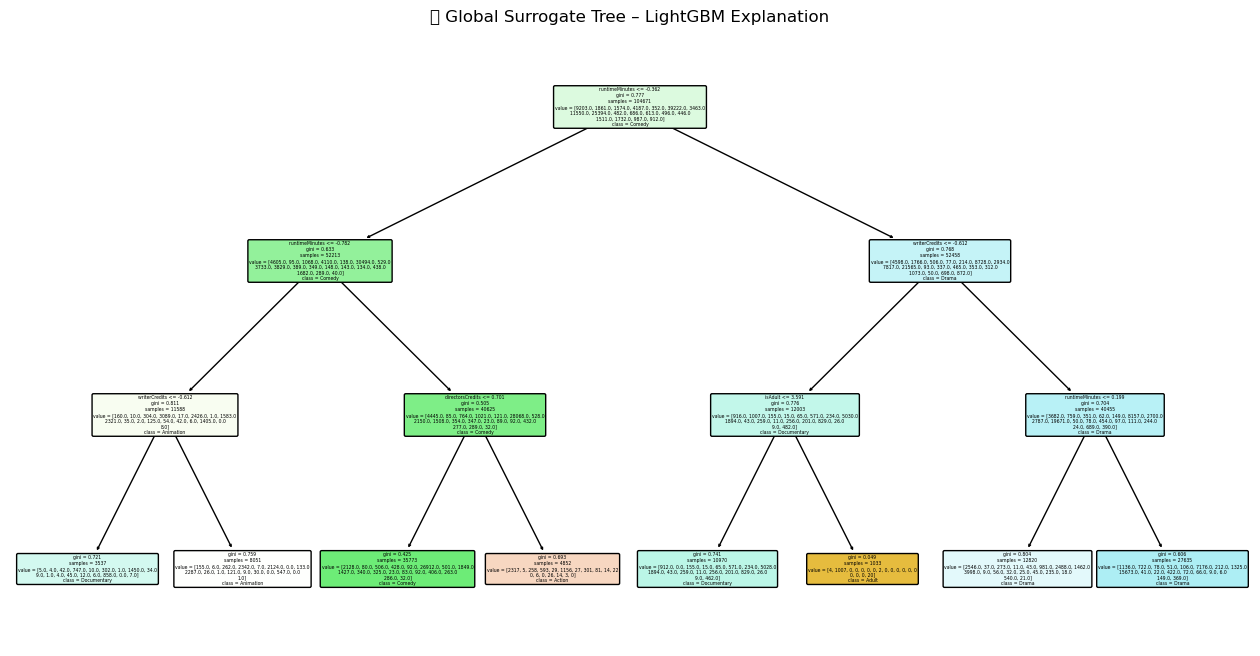

In [89]:
plt.figure(figsize=(16, 8))
plot_tree(surrogate_tree, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.title("🌳 Global Surrogate Tree – LightGBM Explanation")
plt.show()


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_1154/842893777.py:12: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_1154/842893777.py:13: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.savefig("global_surrogate_tree_enhanced.png", dpi=300)  # ruhet si imazh HD
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


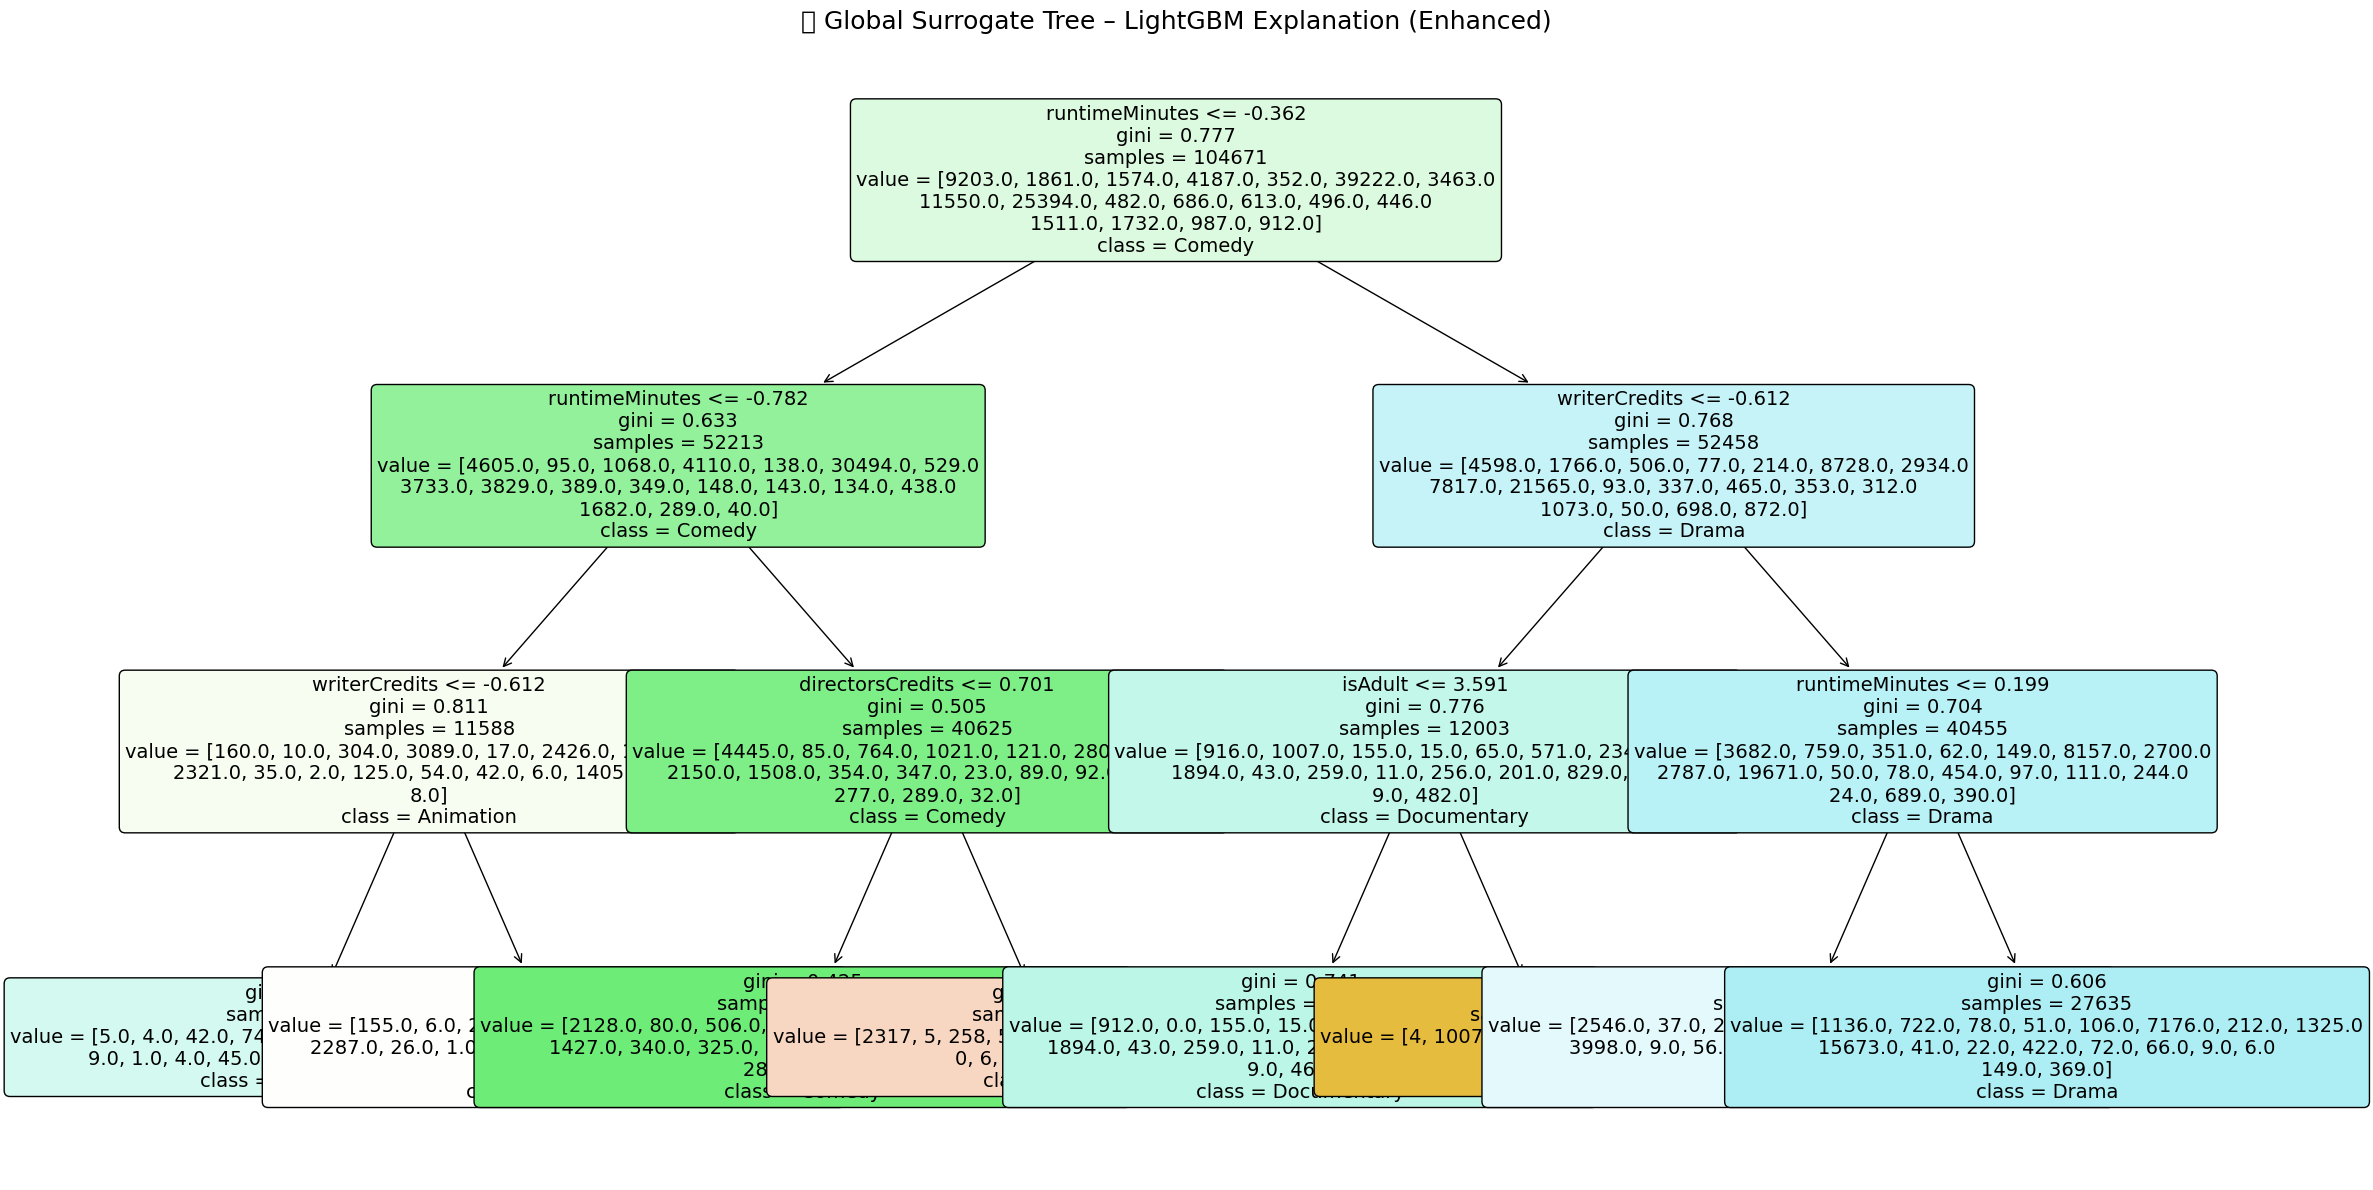

In [91]:
plt.figure(figsize=(24, 12))  # madhësia më e madhe për kuti më të lexueshme
plot_tree(
    surrogate_tree,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=14               # tekst më i madh në nyjet e pemës
)

plt.title("🌳 Global Surrogate Tree – LightGBM Explanation (Enhanced)", fontsize=18)
plt.tight_layout()
plt.savefig("global_surrogate_tree_enhanced.png", dpi=300)  # ruhet si imazh HD
plt.show()


In [127]:

# 7. Modeli LightGBM
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. SHAP explainer
explainer = shap.TreeExplainer(model)

# 9. Gjej një instance me isAdult = 0
for i in range(len(X_test)):
    inv = scaler.inverse_transform([X_test[i]])[0]
    if inv[selected_cols.index('isAdult')] == 0:
        idx = i
        break

original_instance = X_test[idx].reshape(1, -1)

# 10. Ndrysho vetëm isAdult në 1
mod_inverse = scaler.inverse_transform(original_instance)
mod_inverse[0][selected_cols.index('isAdult')] = 1
modified_instance = scaler.transform(mod_inverse)

# 11. Parashikime
pred_original = model.predict(original_instance)[0]
pred_modified = model.predict(modified_instance)[0]

print("🎯 Parashikim para (isAdult=0):", class_names[pred_original])
print("🎯 Parashikim pas (isAdult=1):", class_names[pred_modified])

shap_values = explainer.shap_values(original_instance)
shap_value_instance = shap_values[0, :, pred_original]  # (n_features,)

shap.force_plot(
    explainer.expected_value[pred_original],
    shap_value_instance,
    feature_names=selected_cols,
    features=original_instance[0]
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 104671, number of used features: 9
[LightGBM] [Info] Start training from score -2.066674
[LightGBM] [Info] Start training from score -4.047600
[LightGBM] [Info] Start training from score -2.800165
[LightGBM] [Info] Start training from score -2.946802
[LightGBM] [Info] Start training from score -4.074771
[LightGBM] [Info] Start training from score -1.424415
[LightGBM] [Info] Start training from score -2.690023
[LightGBM] [Info] Start training from score -2.430641
[LightGBM] [Info] Start training from score -1.752648
[LightGBM] [Info] Start training from score -4.340401
[LightGBM] [Info] Start training from score -4.572936
[LightGBM] [Info] Start training from score -4.161016

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [129]:
# SHAP force plot për versionin para ndryshimit (p.sh. runtime ≈ 100)
shap_vals_orig = explainer.shap_values(original)
pred_class_orig = np.argmax(model.predict_proba(original))

shap.force_plot(
    explainer.expected_value[pred_class_orig],
    shap_vals_orig[0, :, pred_class_orig],
    feature_names=selected_cols,
    features=original[0]
)


In [101]:
# 1. Modifikim i vlerës në versionin jo të standardizuar
modified_inverse[0][selected_cols.index('isAdult')] = 1

# 2. Rikthim në formë të standardizuar për modelin
modified_instance = scaler.transform(modified_inverse)

# 3. Predikimi i ri
pred_modified = model.predict(modified_instance)[0]

# 4. SHAP values të reja
shap_values_mod = explainer.shap_values(modified_instance)
shap_value_mod = shap_values_mod[0, :, pred_modified]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [103]:
print("Original genre:", class_names[pred_original])
print("Modified genre:", class_names[pred_modified])


Original genre: Comedy
Modified genre: Adult


In [105]:
# Gjej një film me awardWins = 0
for i in range(len(X_test)):
    inv = scaler.inverse_transform([X_test[i]])[0]
    if inv[selected_cols.index('awardWins')] == 0:
        idx = i
        break

original = X_test[idx].reshape(1, -1)

# Ndrysho awardWins nga 0 → 10
modified = scaler.inverse_transform(original)
modified[0][selected_cols.index('awardWins')] = 10
modified_scaled = scaler.transform(modified)

# Predikimet
pred_orig = model.predict(original)[0]
pred_mod = model.predict(modified_scaled)[0]

print("🎯 Para (awardWins=0):", class_names[pred_orig])
print("🎯 Pas (awardWins=10):", class_names[pred_mod])

# SHAP
explainer = shap.TreeExplainer(model)
shap_values_orig = explainer.shap_values(original)
shap_values_mod = explainer.shap_values(modified_scaled)

shap.initjs()

shap.force_plot(
    explainer.expected_value[pred_orig],
    shap_values_orig[0, :, pred_orig],
    feature_names=selected_cols,
    features=original[0]
)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


🎯 Para (awardWins=0): Comedy
🎯 Pas (awardWins=10): Comedy


In [107]:
# 🔍 Gjej një instance me runtime ≈ 100 minuta
runtime_idx = selected_cols.index("runtimeMinutes")
for i in range(len(X_test)):
    inv = scaler.inverse_transform([X_test[i]])[0]
    if 95 <= inv[runtime_idx] <= 105:
        idx = i
        break

original = X_test[idx].reshape(1, -1)

# 🎯 Ndrysho runtime në 180 minuta
mod = scaler.inverse_transform(original)
mod[0][runtime_idx] = 180
mod_scaled = scaler.transform(mod)

# Predikim
pred_orig = model.predict(original)[0]
pred_mod = model.predict(mod_scaled)[0]

print("📌 Parashikim PARA:", class_names[pred_orig])
print("📌 Parashikim PAS  :", class_names[pred_mod])

# SHAP Values
shap_vals_orig = explainer.shap_values(original)
shap_vals_mod = explainer.shap_values(mod_scaled)

shap.initjs()
shap.force_plot(
    explainer.expected_value[pred_orig],
    shap_vals_orig[0, :, pred_orig],
    feature_names=selected_cols,
    features=original[0]
)


📌 Parashikim PARA: Comedy
📌 Parashikim PAS  : Other


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [111]:
# Importo SHAP (sigurohu që është instaluar)
import shap

# Ri-krijo shap explainer nëse ke rifilluar notebook-un
explainer = shap.TreeExplainer(model)

# Gjej SHAP values për instance origjinale (para ndryshimit)
shap_values_before = explainer.shap_values(original)
shap_val_before = shap_values_before[0, :, pred_orig]

# Shfaq force plot për klasifikimin origjinal (p.sh. Comedy)
shap.initjs()
shap.force_plot(
    explainer.expected_value[pred_orig],
    shap_val_before,
    feature_names=selected_cols,
    features=original[0]
)


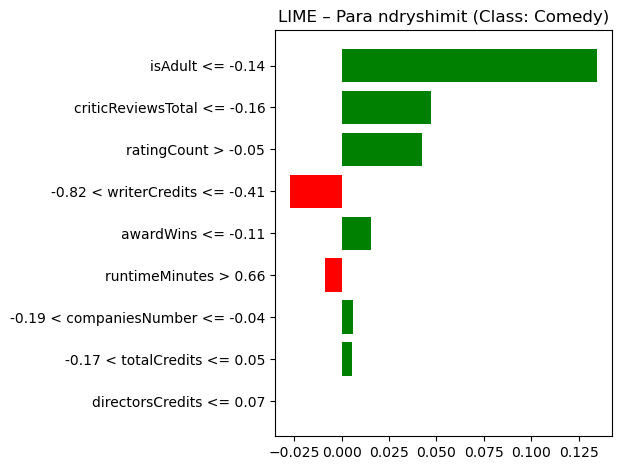

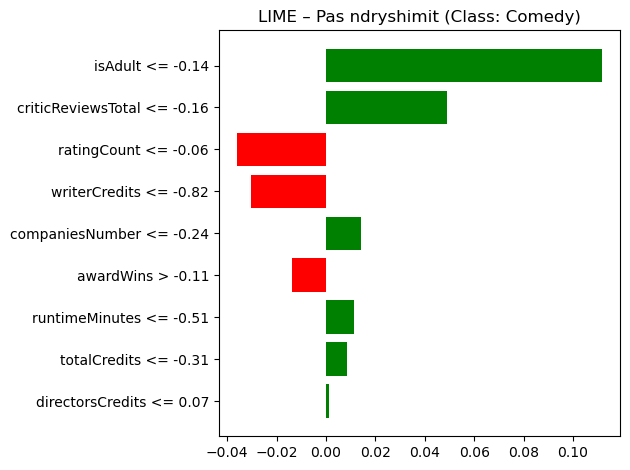

In [109]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# Krijo explainer për train set-in tënd
lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=selected_cols,
    class_names=class_names.tolist(),
    mode='classification'
)

predict_fn = lambda x: model.predict_proba(x)

# Analizo instance para ndryshimit
lime_exp_orig = lime_explainer.explain_instance(
    data_row=original[0],
    predict_fn=predict_fn,
    num_features=len(selected_cols),
    top_labels=10
)

# Analizo instance pas ndryshimit
lime_exp_mod = lime_explainer.explain_instance(
    data_row=modified_scaled[0],
    predict_fn=predict_fn,
    num_features=len(selected_cols),
    top_labels=10
)

# Parashikimet
pred_class_orig = np.argmax(predict_fn(original))
pred_class_mod = np.argmax(predict_fn(modified_scaled))

# Vizualizo të parën
fig1 = lime_exp_orig.as_pyplot_figure(label=pred_class_orig)
plt.title(f"LIME – Para ndryshimit (Class: {class_names[pred_class_orig]})")
plt.tight_layout()
plt.show()

# Vizualizo të dytën
fig2 = lime_exp_mod.as_pyplot_figure(label=pred_class_mod)
plt.title(f"LIME – Pas ndryshimit (Class: {class_names[pred_class_mod]})")
plt.tight_layout()
plt.show()


In [17]:
##shap

In [19]:
!pip install shap


📌 Kjo instance u klasifikua si: Comedy


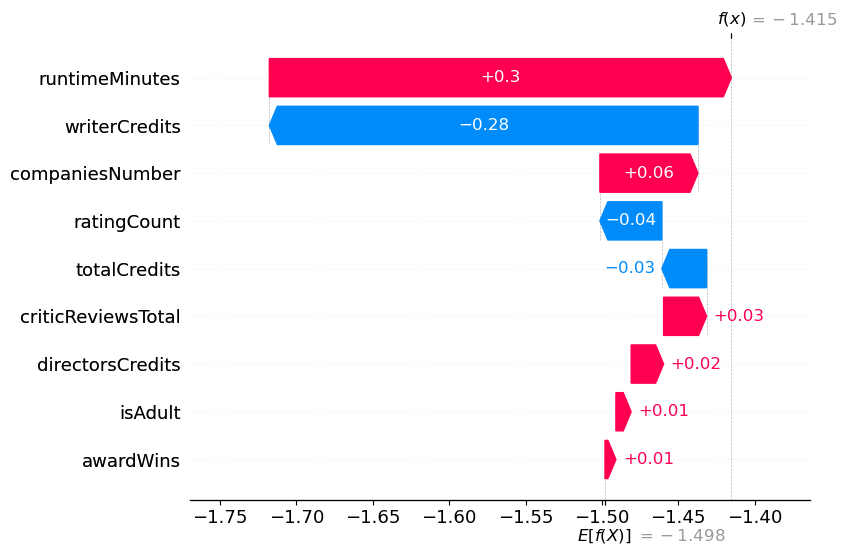

In [27]:
import shap
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Krijo SHAP explainer
explainer = shap.TreeExplainer(lgbm)

# 2️⃣ Zgjidh një instance nga test set
i = 0
sample = X_test[i].reshape(1, -1)

# 3️⃣ Merr shap values për të gjitha klasat
shap_values = explainer.shap_values(sample)

# 4️⃣ Gjej klasën e parashikuar nga modeli
pred_class = np.argmax(lgbm.predict_proba(sample))
print("📌 Kjo instance u klasifikua si:", class_names[pred_class])

# Merr shap values për klasën e parashikuar
shap_values_class = shap_values[0, :, pred_class]  # (9,)

# Vizato waterfall plot për këtë klasë
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[pred_class],
    shap_values_class,
    feature_names=X.columns
)
plt.show()


In [25]:
print(type(shap_values))         # list apo array?
print(len(shap_values))          # sa elementë ka (duhet = nr klasash nëse është listë)
print(np.shape(shap_values))     # forma e plotë


<class 'numpy.ndarray'>
1
(1, 9, 18)


In [33]:
import shap

# Sigurohu që SHAP është inicializuar
shap.initjs()

# Merr shap values për instance 0 dhe klasën e parashikuar
shap_value_instance = shap_values[0, :, pred_class]
shap.force_plot(
    explainer.expected_value[pred_class],
    shap_value_instance,
    feature_names=X.columns,
    features=sample[0]   # kjo do të afishohet poshtë secilës veçori
)



In [35]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# 1️⃣ Krijo Lime Explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train,              # të dhënat e trajnimit të standardizuara
    feature_names=X.columns.tolist(),
    class_names=class_names.tolist(),
    mode='classification'
)

# 2️⃣ Zgjidh instance për interpretim
i = 0
sample = X_test[i]

# 3️⃣ Merr funksionin prediktues nga modeli yt
predict_fn = lambda x: lgbm.predict_proba(x)

# 4️⃣ Merr interpretimin nga LIME
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=predict_fn,
    num_features=len(X.columns)
)

# 5️⃣ Vizualizo grafikun
lime_exp.show_in_notebook(show_table=True)


In [41]:
top_labels=10


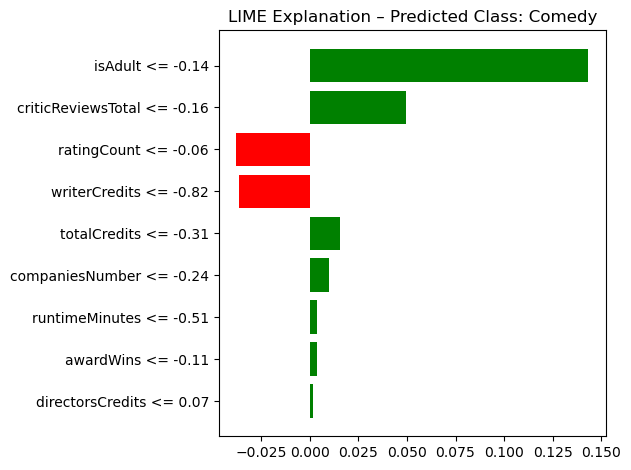

In [43]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Krijo LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns.tolist(),
    class_names=class_names.tolist(),
    mode='classification'
)

# 2️⃣ Merr një instance
i = 0
sample = X_test[i]

# 3️⃣ Funksioni prediktues
predict_fn = lambda x: lgbm.predict_proba(x)

# 4️⃣ Merr interpretimin, por tani me top_labels > pred_class
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=predict_fn,
    num_features=len(X.columns),
    top_labels=10         # ⬅️ Ky është çelësi që zgjidh problemin
)

# 5️⃣ Merr klasën e parashikuar
pred_class = np.argmax(predict_fn(sample.reshape(1, -1)))

# 6️⃣ Shfaq grafikun
fig = lime_exp.as_pyplot_figure(label=pred_class)
plt.title(f"LIME Explanation – Predicted Class: {class_names[pred_class]}")
plt.tight_layout()
plt.show()


In [51]:
### Rating

In [231]:
#  Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_cleaned_finale.csv')
df = df.dropna(subset=['rating'])
df['rating'] = df['rating'].astype(int)
df = df[df['rating'].between(0, 9)]

# Zgjedhim vetëm këto veçori
selected_cols = [
    'runtimeMinutes', 'awardWins', 'totalCredits', 'criticReviewsTotal',
    'isAdult', 'ratingCount', 'companiesNumber', 'writerCredits', 'directorsCredits'
]
df = df[selected_cols + ['rating']].dropna()

# Target dhe veçoritë
y = df['rating']
X = df.drop(columns='rating')

# Standardizim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ndarja
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

print(f"✅ Dataset reduced: {X.shape[0]} samples, {X.shape[1]} features")


✅ Dataset reduced: 145250 samples, 9 features


In [233]:
from lightgbm import LGBMClassifier

lgbm_rating = LGBMClassifier(random_state=42)
lgbm_rating.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1281
[LightGBM] [Info] Number of data points in the train set: 101675, number of used features: 9
[LightGBM] [Info] Start training from score -7.402402
[LightGBM] [Info] Start training from score -5.724402
[LightGBM] [Info] Start training from score -4.811732
[LightGBM] [Info] Start training from score -3.742155
[LightGBM] [Info] Start training from score -2.771753
[LightGBM] [Info] Start training from score -1.918610
[LightGBM] [Info] Start training from score -1.314089
[LightGBM] [Info] Start training from score -1.095745
[LightGBM] [Info] Start training from score -1.884431


LGBMClassifier(random_state=42)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1281
[LightGBM] [Info] Number of data points in the train set: 101675, number of used features: 9
[LightGBM] [Info] Start training from score -7.402402
[LightGBM] [Info] Start training from score -5.724402
[LightGBM] [Info] Start training from score -4.811732
[LightGBM] [Info] Start training from score -3.742155
[LightGBM] [Info] Start training from score -2.771753
[LightGBM] [Info] Start training from score -1.918610
[LightGBM] [Info] Start training from score -1.314089
[LightGBM] [Info] Start training from score -1.095745
[LightGBM] [Info] Start training from score -1.884431


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_1154/617054050.py:28: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_1154/617054050.py:29: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.savefig("global_surrogate_tree_rating.png", dpi=300)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


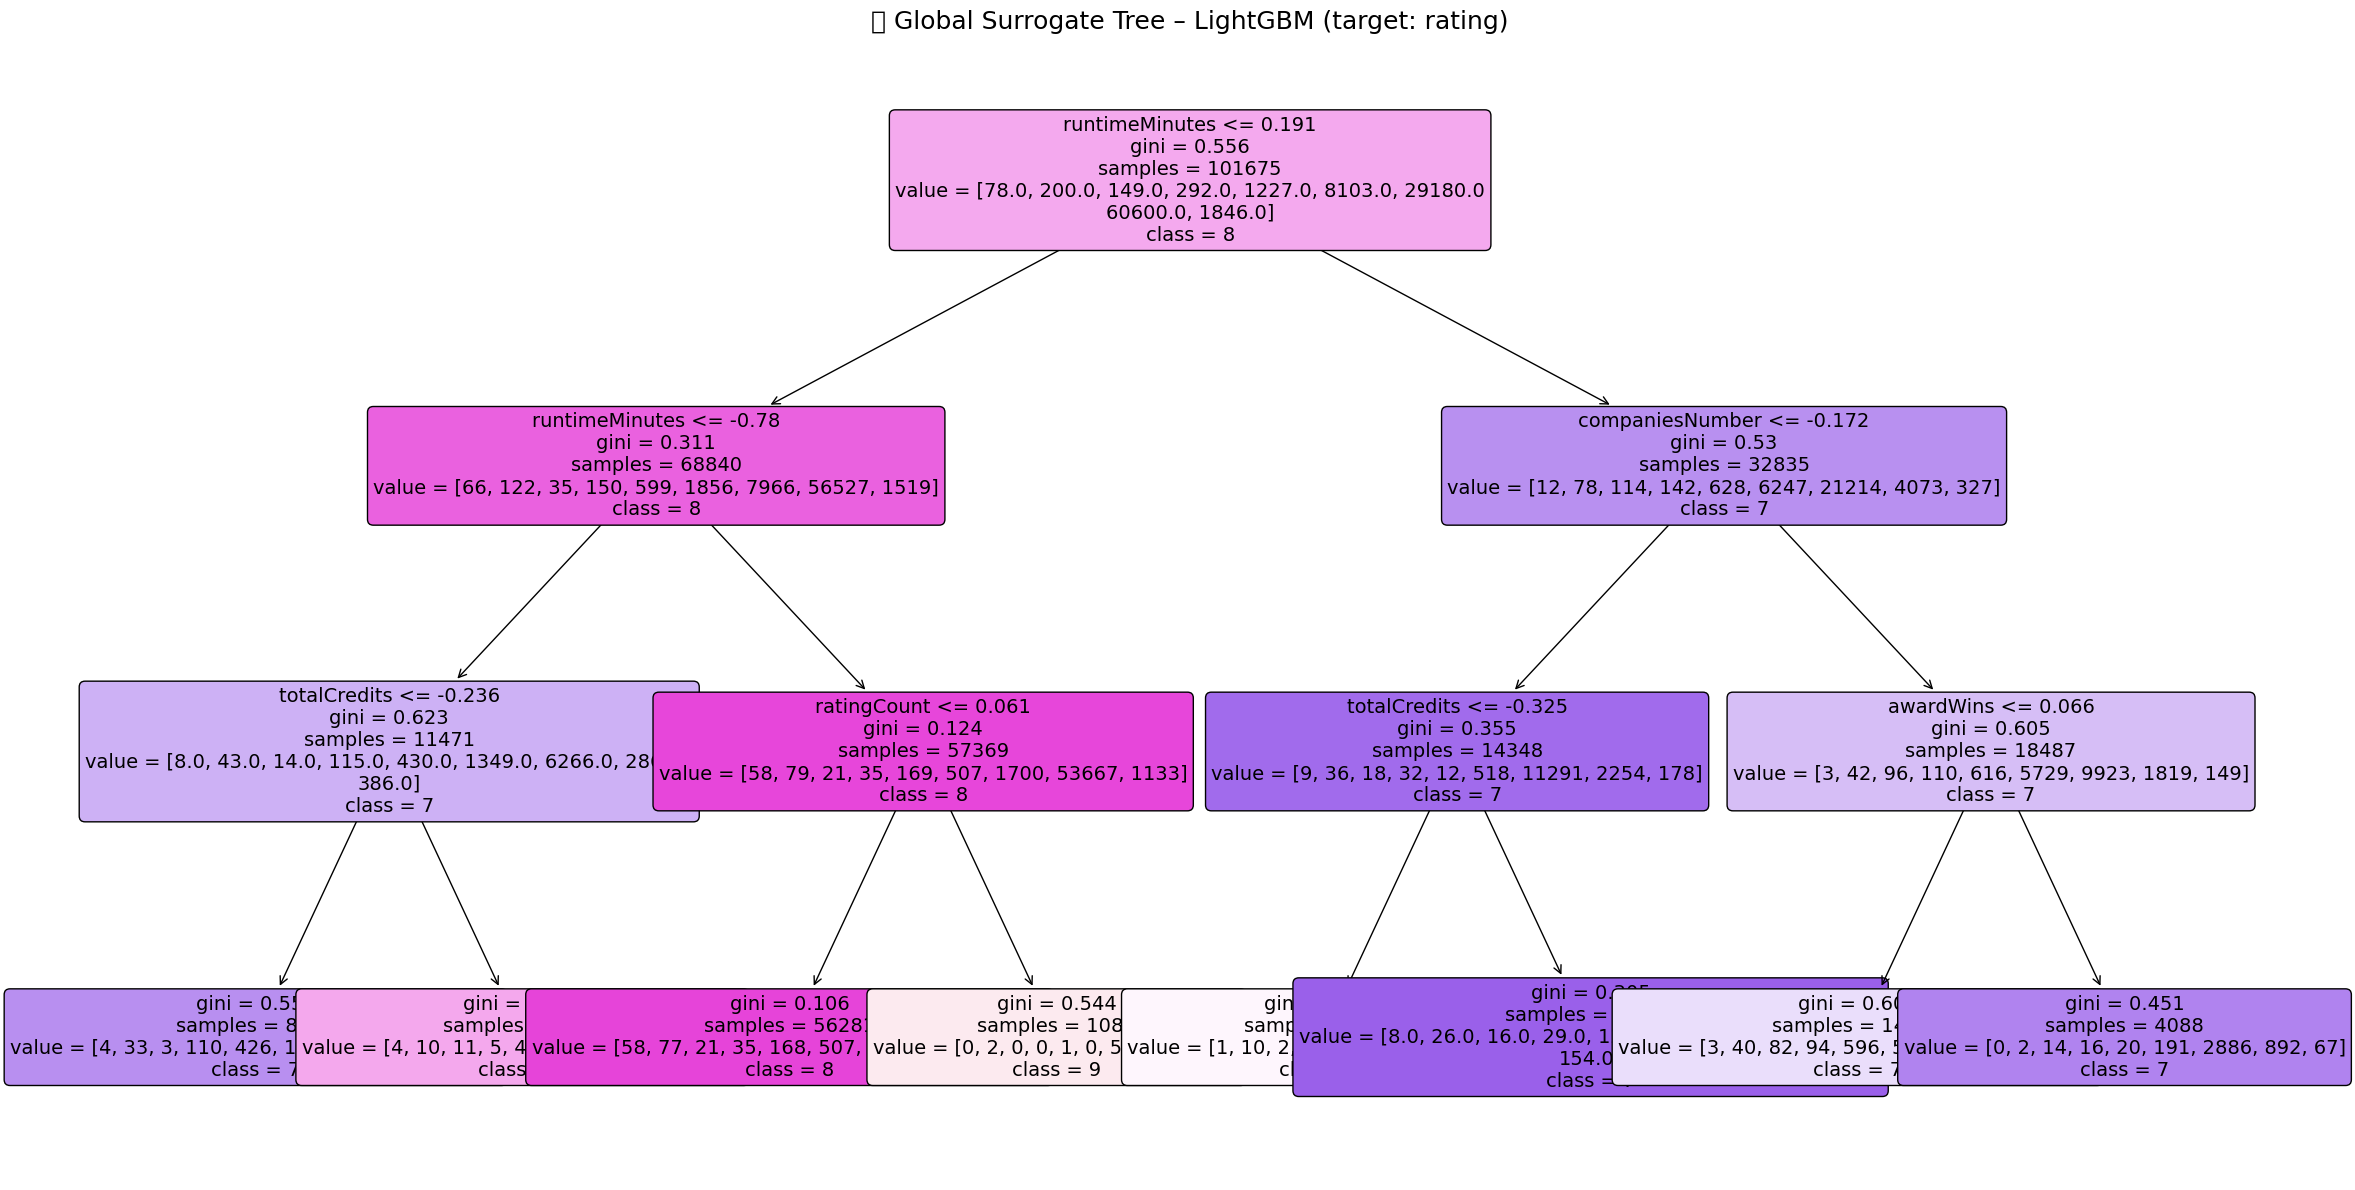

In [235]:
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Trajno modelin LightGBM
lgbm_rating = LGBMClassifier(random_state=42)
lgbm_rating.fit(X_train, y_train)

# Predikime në train set
y_train_pred = lgbm_rating.predict(X_train)

# Surrogate model
surrogate_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate_tree.fit(X_train, y_train_pred)

# Vizualizimi
plt.figure(figsize=(24, 12))
plot_tree(
    surrogate_tree,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(np.unique(y_train))],
    filled=True,
    rounded=True,
    fontsize=14
)
plt.title("🌳 Global Surrogate Tree – LightGBM (target: rating)", fontsize=18)
plt.tight_layout()
plt.savefig("global_surrogate_tree_rating.png", dpi=300)
plt.show()


In [59]:
# shap–rating

📌 Predicted rating: 5


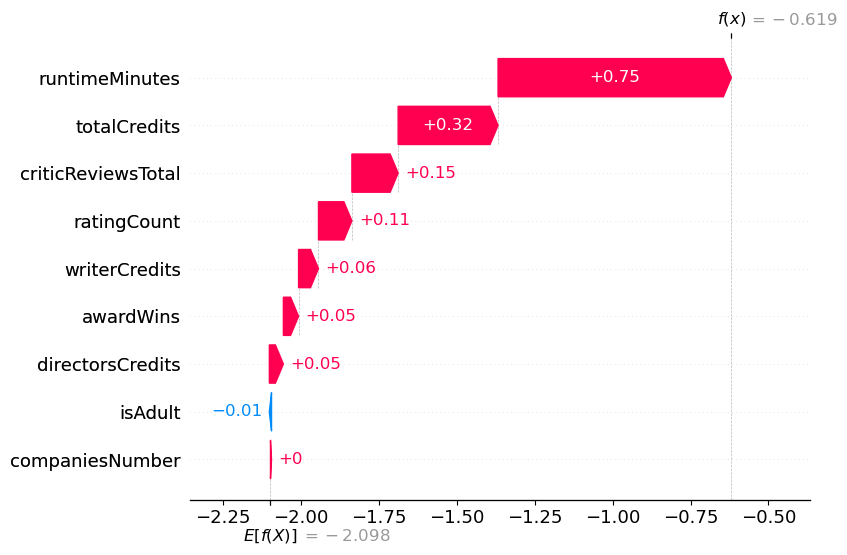

In [177]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Krijo SHAP explainer
explainer = shap.TreeExplainer(lgbm_rating)

# 2️⃣ Merr një instance nga X_test
i = 0
sample = X_test[i].reshape(1, -1)

# 3️⃣ SHAP values për të gjitha klasat
shap_values = explainer.shap_values(sample)

# 4️⃣ Gjej klasën e parashikuar nga modeli
pred_class = np.argmax(lgbm_rating.predict_proba(sample))
print("📌 Predicted rating:", pred_class)

# 5️⃣ Ekstrakto shap values për klasën e parashikuar
shap_value_instance = shap_values[0][0, :, pred_class] if isinstance(shap_values, list) else shap_values[0, :, pred_class]

# 6️⃣ Vizualizo me waterfall plot
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[pred_class],
    shap_value_instance,
    feature_names=X.columns
)
plt.show()


📌 Predicted rating: 5


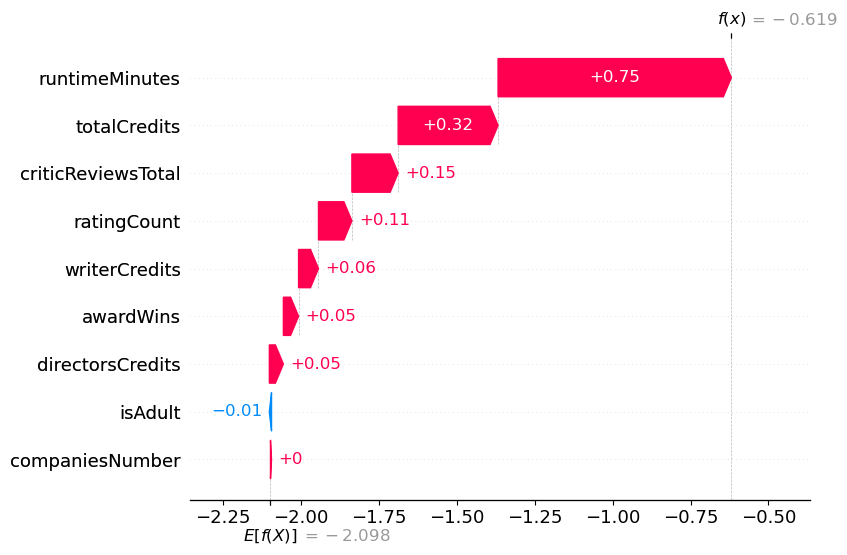

In [179]:
import shap

explainer = shap.TreeExplainer(lgbm_rating)
i = 0
sample = X_test[i].reshape(1, -1)

# Merr SHAP values
shap_values = explainer.shap_values(sample)
pred_class = np.argmax(lgbm_rating.predict_proba(sample))
print("📌 Predicted rating:", pred_class)

# Ekstrakto SHAP për klasën e parashikuar
shap_value_instance = shap_values[0, :, pred_class]

# Vizualizo
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[pred_class],
    shap_value_instance,
    feature_names=X.columns
)


In [181]:
import shap

# 1️⃣ Inicializo SHAP për vizualizime interaktive në notebook
shap.initjs()

# 2️⃣ Zgjidh instance për analizë
i = 0
sample = X_test[i].reshape(1, -1)

# 3️⃣ Merr SHAP values për instance
explainer = shap.TreeExplainer(lgbm_rating)
shap_values = explainer.shap_values(sample)

# 4️⃣ Gjej klasën e parashikuar
pred_class = np.argmax(lgbm_rating.predict_proba(sample))

# 5️⃣ Shfaq force plot me vlerat poshtë çdo veçorie
shap.force_plot(
    explainer.expected_value[pred_class],
    shap_values[0, :, pred_class],
    feature_names=X.columns,
    features=sample[0]   # Vlerat reale të veçorive për këtë instance
)


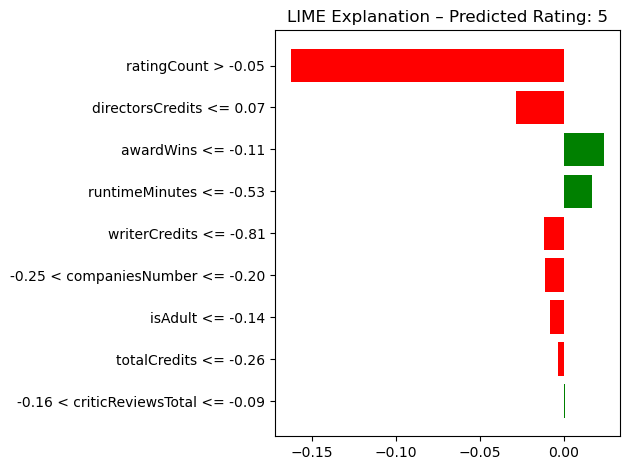

In [67]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Krijo LIME explainer mbi train set
lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns.tolist(),
    class_names=[str(i) for i in sorted(np.unique(y_train))],
    mode='classification'
)

# 2️⃣ Merr një instance për analizë
i = 0
sample = X_test[i]

# 3️⃣ Funksioni prediktues
predict_fn = lambda x: lgbm_rating.predict_proba(x)

# 4️⃣ Gjenero interpretimin për këtë instance
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=predict_fn,
    num_features=len(X.columns),
    top_labels=10  # siguron që klasifikimi parashikuar të përfshihet
)

# 5️⃣ Gjej klasën e parashikuar
pred_class = np.argmax(predict_fn(sample.reshape(1, -1)))

# 6️⃣ Vizualizo si barplot të pastër me matplotlib
fig = lime_exp.as_pyplot_figure(label=pred_class)
plt.title(f"LIME Explanation – Predicted Rating: {pred_class}")
plt.tight_layout()
plt.show()


In [69]:
# Merr parashikimet për gjithë X_test
preds = lgbm_rating.predict(X_test)

# Gjej indekset për rating 5 dhe 8
idx_5 = np.where(preds == 5)[0][0]
idx_8 = np.where(preds == 8)[0][0]

print(f"📌 Instance me rating=5: index {idx_5}")
print(f"📌 Instance me rating=8: index {idx_8}")


📌 Instance me rating=5: index 53
📌 Instance me rating=8: index 1


In [237]:
from lightgbm import LGBMClassifier
import shap

# 1. Krijo modelin si multiclass
model = LGBMClassifier(
    boosting_type='gbdt',
    objective='multiclass',
    num_class=10,
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    random_state=42
)

# 2. Trajno modelin
model.fit(X_train, y_train)

# 3. SHAP explainer
explainer = shap.TreeExplainer(model)

# 4. Gjej një instance me ratingCount ≈ 100
idx_col = selected_cols.index("ratingCount")
for i in range(len(X_test)):
    inv = scaler.inverse_transform([X_test[i]])[0]
    if 90 <= inv[idx_col] <= 110:
        idx = i
        break

original = X_test[idx].reshape(1, -1)

# 5. Ndrysho ratingCount në 5000
modified = scaler.inverse_transform(original)
modified[0][idx_col] = 5000
mod_scaled = scaler.transform(modified)

# 6. Predikim para dhe pas
pred_orig = int(model.predict(original)[0])
pred_mod = int(model.predict(mod_scaled)[0])

print("📌 PARA:", pred_orig)
print("📌 PAS :", pred_mod)

# 7. SHAP vlerat
shap_values = explainer.shap_values(original)
shap_values_mod = explainer.shap_values(mod_scaled)

# 8. Force plot (pas kontrollit që shap_values është listë me 10 elementë)
shap.initjs()
shap.plots.force(
    explainer.expected_value[pred_orig],
    shap_values[pred_orig][0],
    feature_names=selected_cols
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1281
[LightGBM] [Info] Number of data points in the train set: 101675, number of used features: 9
[LightGBM] [Info] Start training from score -7.402402
[LightGBM] [Info] Start training from score -5.724402
[LightGBM] [Info] Start training from score -4.811732
[LightGBM] [Info] Start training from score -3.742155
[LightGBM] [Info] Start training from score -2.771753
[LightGBM] [Info] Start training from score -1.918610
[LightGBM] [Info] Start training from score -1.314089
[LightGBM] [Info] Start training from score -1.095745
[LightGBM] [Info] Start training from score -1.884431
📌 PARA: 8
📌 PAS : 9


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


IndexError: index 8 is out of bounds for axis 0 with size 1

In [239]:
print("⏬ Type i shap_values:", type(shap_values))
print("⏬ Forma:", np.shape(shap_values))


⏬ Type i shap_values: <class 'numpy.ndarray'>
⏬ Forma: (1, 9, 9)


In [241]:
pred_class = int(model.predict(original)[0])


In [243]:
shap.plots.force(
    explainer.expected_value[pred_class],
    shap_values[0, :, pred_class],       # (1, 9, 9) → merr rreshtin 0 dhe klasën e parashikuar
    feature_names=selected_cols,
    features=original[0]
)


In [245]:
print("▶ Klasa e parashikuar pas ndryshimit:", pred_class_mod)
print("▶ Numri i klasave në SHAP:", len(explainer.expected_value))


▶ Klasa e parashikuar pas ndryshimit: 9
▶ Numri i klasave në SHAP: 9


In [247]:
shap.plots.force(
    explainer.expected_value[-1],                # merr klasën e fundit (8)
    shap_values_mod[0, :, -1],                   # merr shap për klasën 8
    feature_names=selected_cols,
    features=mod_scaled[0]
)


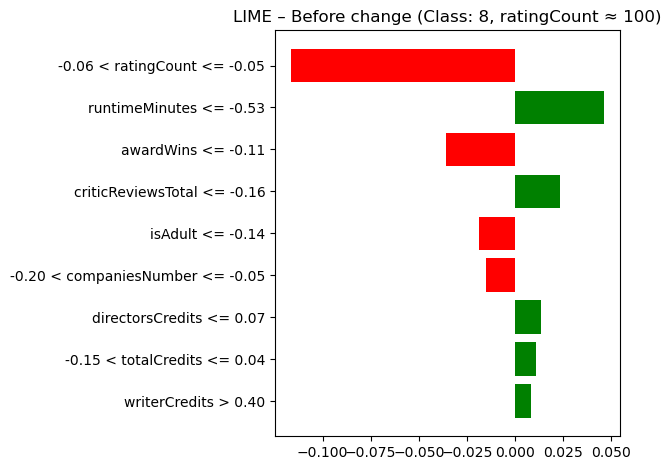

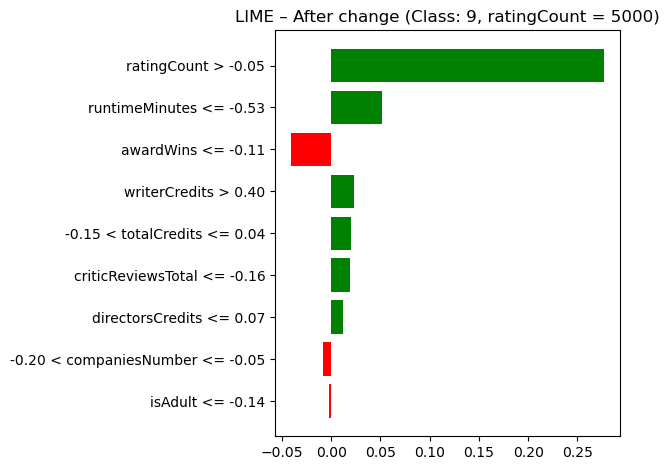

In [249]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# 1. Krijo LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=selected_cols,
    class_names=[str(i) for i in range(10)],
    mode='classification'
)

# 2. Funksioni i predikimit për LIME
predict_fn = lambda x: model.predict_proba(x)

# 3. Shpjegim për instance PARA
lime_exp_orig = lime_explainer.explain_instance(
    data_row=original[0],
    predict_fn=predict_fn,
    num_features=len(selected_cols),
    top_labels=10
)

# 4. Shpjegim për instance PAS
lime_exp_mod = lime_explainer.explain_instance(
    data_row=mod_scaled[0],
    predict_fn=predict_fn,
    num_features=len(selected_cols),
    top_labels=10
)

# 5. Predikime të klasave
pred_class_orig = int(model.predict(original)[0])
pred_class_mod = int(model.predict(mod_scaled)[0])

# 6. Vizualizimi – PARA
if pred_class_orig in lime_exp_orig.available_labels():
    fig1 = lime_exp_orig.as_pyplot_figure(label=pred_class_orig)
else:
    fig1 = lime_exp_orig.as_pyplot_figure(label=lime_exp_orig.available_labels()[0])
plt.title(f"LIME – Before change (Class: {pred_class_orig}, ratingCount ≈ 100)")

plt.tight_layout()
plt.show()

# 7. Vizualizimi – PAS
if pred_class_mod in lime_exp_mod.available_labels():
    fig2 = lime_exp_mod.as_pyplot_figure(label=pred_class_mod)
else:
    fig2 = lime_exp_mod.as_pyplot_figure(label=lime_exp_mod.available_labels()[0])
plt.title(f"LIME – After change (Class: {pred_class_mod}, ratingCount = 5000)")

plt.tight_layout()
plt.show()


In [223]:
print("🟢 Klasat e disponueshme në LIME (pas):", lime_exp_mod.available_labels())


🟢 Klasat e disponueshme në LIME (pas): [8]
